In [445]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns

# 1. Linear Regression

# a. Dataset creation:

# i. Please generate a dataset (X,Y) of 1500 samples from a normal 
# distribution N(0,1), each with 2 dimensional features.
# If input = x, output(y) = βx = β0 + β1x1 + β2x2
# Assign β to some values within the range 1-2 before generating y

In [446]:
X = pd.DataFrame()
np.random.seed(1)
X["x1"] = np.random.normal(0,1,1500)
X["x2"] = np.random.normal(0,1,1500)

In [447]:
print(X)

            x1        x2
0     1.624345  1.301225
1    -0.611756 -0.312392
2    -0.528172 -0.271229
3    -1.072969  1.862913
4     0.865408 -0.642874
...        ...       ...
1495  0.196645 -0.771890
1496 -0.632590 -0.622657
1497 -0.209847 -0.150660
1498  1.897161 -1.400023
1499 -1.381391 -1.301066

[1500 rows x 2 columns]


In [448]:
np.random.seed(1)
B = np.random.uniform(low=1,high=2,size=3)

In [449]:
print("Beta value: ",B)

Beta value:  [1.417022   1.72032449 1.00011437]


In [450]:
y = B[0]+B[1]*X["x1"]+B[2]*X["x2"]

In [451]:
print("\ny values:\n")
print(y)


y values:

0       5.512797
1       0.052175
2       0.237135
3       1.434294
4       2.262857
          ...   
1495    0.983337
1496   -0.293966
1497    0.905340
1498    3.280571
1499   -2.260634
Length: 1500, dtype: float64


# ii. Create a train-test split of 80-20.

In [452]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [453]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 2), (300, 2), (1200,), (300,))

# iii. Visualize the data in a 2-D plane 
# and plot them (Feature 1(x-axis),Feature-2(y-axis)).

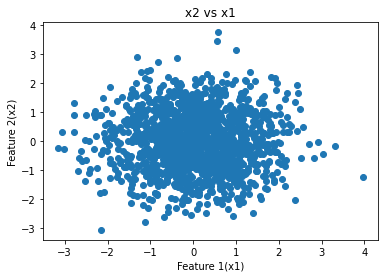

In [454]:
plt.scatter(X["x1"],X["x2"])
plt.xlabel("Feature 1(x1)")
plt.ylabel("Feature 2(x2)")
plt.title("x2 vs x1")
plt.show()

# b. Modelling
# i. Use scikit learn library to train a linear regression model
# and save the parameter values (named as say, P1).

In [455]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
p1 = np.concatenate((np.array([lin_reg.intercept_]),np.array(lin_reg.coef_)),axis=0)
print("P1 :",p1)

P1 : [1.417022   1.72032449 1.00011437]


# ii. Design the linear regression algorithm using sample code available 
# in https://www.dropbox.com/s/falgjz3h8ntf5ff/lr_algo.py?dl=0 . You’ve
# to complete the gradDes(...) algorithm which is essentially the update
# step of stochastic gradient descent as studied in class. Let’s name
# the parameter values as P2.

In [456]:
X_train.head()

,x1,x2
73,0.876169,0.608580
701,1.223722,0.040865
1307,1.217716,-1.156376
556,-0.222414,1.475183
785,-1.940681,0.380743


In [457]:
X_test.head()

,x1,x2
91,0.185156,0.100593
75,-2.022201,-0.347010
1264,0.329490,-0.858823
330,0.438166,0.047535
1349,1.430933,-0.472613


In [458]:
X_train_new = X_train.copy()
X_train_new.insert(loc=0, column='x0', value=np.full(X_train.shape[0],1))

In [459]:
print(X_train_new)

      x0        x1        x2
73     1  0.876169  0.608580
701    1  1.223722  0.040865
1307   1  1.217716 -1.156376
556    1 -0.222414  1.475183
785    1 -1.940681  0.380743
...   ..       ...       ...
715    1  1.498108 -0.791534
905    1 -0.832395 -0.168662
1096   1  0.096114 -2.356865
235    1 -1.233121  0.804123
1061   1  0.186937  1.230299

[1200 rows x 3 columns]


In [460]:
import numpy as np

eta = 0.01
theta = np.zeros(3)               #initialise with zeros
iters = 2000

def compCost(X, y, theta):
    tempval = np.dot(X, theta) - y
    return np.sum(np.power(tempval, 2)) / (2*X.shape[0])


def gradCost(X,y,theta):
    return np.transpose(X)@(X@theta-y)/(2*X.shape[0])

def gradDes(X, y, theta, eta, iters):

    cost = []
    for i in range(iters):
        s=10                                        #Stochastic gradient descent with sample size s
        temp = pd.concat([X, y], axis=1).sample(s)  #Taking a sample size of s out of whole train dataset for param update
        x_sample = temp.iloc[:,0:3]
        y_sample = temp.iloc[:,-1]
        theta = theta - eta* gradCost(x_sample,y_sample,theta)
        
        cost.append(compCost(x_sample, y_sample, theta)) #appending cost values
    return theta,cost

theta,cost = gradDes(X_train_new, y_train, theta, eta, iters)
print(theta)

x0    1.416959
x1    1.720291
x2    1.000054
dtype: float64


In [461]:
p2 = np.array(theta)
print("P2 :",p2)

P2 : [1.41695881 1.7202909  1.00005387]


# iii. Plot the cost values obtained from Step ii (Iterations (x-axis) vs
# Cost values (y-axis)). Ideally, the values should decrease

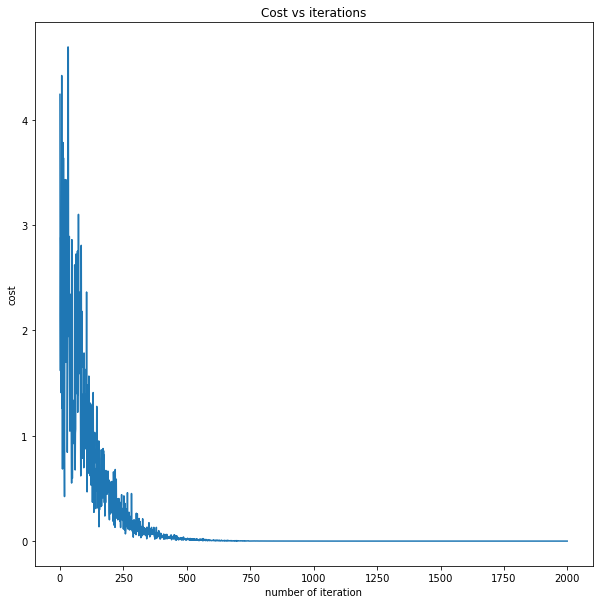

In [462]:
plt.figure(figsize=(10,10))
plt.plot(range(iters),cost)
plt.xlabel("number of iteration")
plt.ylabel("cost")
plt.title("Cost vs iterations")
plt.show()

In [463]:
# observed fluctuation while reduction in cost due to stochastic gradient descent

# this fluctuation will decrease as sample size used for param update increases

# iv. Use scikit learn library to train a ridge regression model on the
# same data and save the parameters (say P3).

In [464]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
p3 = np.concatenate((np.array([ridge_reg.intercept_]),np.array(ridge_reg.coef_)),axis=0)
print("P3 :",p3)

P3 : [1.41706681 1.71916482 0.99943552]


# c. Metrics

# i. Use P1, P2, P3 to report Root Mean Square Error, Mean Absolute
# Error and Normalised Root Mean Square Error on the test set.

In [465]:
rmse1 = (sum((p1[0]+p1[1]*X_test["x1"] + p1[2]*X_test["x2"] - y_test)**2)/(y_test.shape[0]))**0.5
mae1 = sum(abs(p1[0]+p1[1]*X_test["x1"] + p1[2]*X_test["x2"] - y_test))/(y_test.shape[0])
nrmse1 = rmse1/(max(y_test)-min(y_test))

print("\n For P1","\nrmse1:",rmse1,"\nmae1:",mae1,"\nnrmse1:",nrmse1)


 For P1 
rmse1: 8.138191622276077e-16 
mae1: 6.151560742277222e-16 
nrmse1: 6.906495560139614e-17


In [466]:
rmse2 = (sum((p2[0]+p2[1]*X_test["x1"] + p2[2]*X_test["x2"] - y_test)**2)/(y_test.shape[0]))**0.5
mae2 = sum(abs(p2[0]+p2[1]*X_test["x1"] + p2[2]*X_test["x2"] - y_test))/(y_test.shape[0])
nrmse2 = rmse2/(max(y_test)-min(y_test))

print("\n For P2","\nrmse2:",rmse2,"\nmae2:",mae2,"\nnrmse2:",nrmse2)


 For P2 
rmse2: 9.60219727382914e-05 
mae2: 7.884960425190847e-05 
nrmse2: 8.148927417457157e-06


In [467]:
rmse3 = (sum((p3[0]+p3[1]*X_test["x1"] + p3[2]*X_test["x2"] - y_test)**2)/(y_test.shape[0]))**0.5
mae3 = sum(abs(p3[0]+p3[1]*X_test["x1"] + p3[2]*X_test["x2"] - y_test))/(y_test.shape[0])
nrmse3 = rmse3/(max(y_test)-min(y_test))

print("\n For P3","\nrmse3:",rmse3,"\nmae3:",mae3,"\nnrmse3:",nrmse3)


 For P3 
rmse3: 0.0012974061808879408 
mae3: 0.001006454808367245 
nrmse3: 0.00011010468226716673


# ii. Report a plot with x-axis as test set indices, y-axis as the predicted
# values using P1, P2, P3. Use 4 different colors and markers for the plot.

In [468]:
print(X_test.index)

Int64Index([  91,   75, 1264,  330, 1349,  774, 1038, 1285, 1165,  335,
            ...
            1479, 1180,  919,  302,  574, 1094, 1204, 1130,   12,  408],
           dtype='int64', length=300)


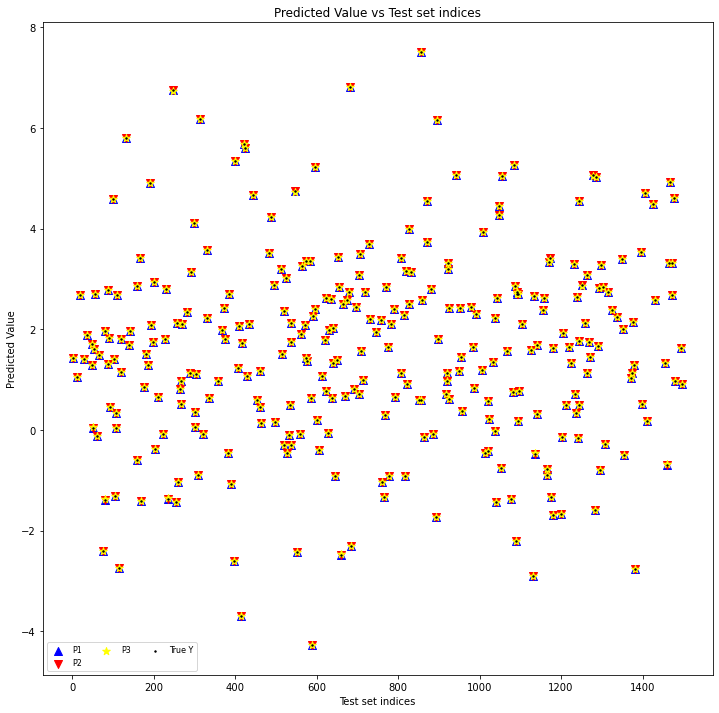

In [469]:
plt.figure(figsize=(12,12))

plt.title("Predicted Value vs Test set indices")
plt.xlabel("Test set indices")
plt.ylabel("Predicted Value")

l1 = plt.scatter(X_test.index,(p1[0]+p1[1]*X_test["x1"] + p1[2]*X_test["x2"]),c="blue" ,marker="^",s=64)
l2 = plt.scatter(X_test.index,(p2[0]+p2[1]*X_test["x1"] + p2[2]*X_test["x2"]),c="red" ,marker="v",s=64)
l3 = plt.scatter(X_test.index,(p3[0]+p3[1]*X_test["x1"] + p3[2]*X_test["x2"]),c="yellow" ,marker="*",s=64)
l4 = plt.scatter(y_test.index,y_test,c="Black" ,marker=".",s=8)
plt.legend((l1, l2, l3,l4),
           ('P1', 'P2', 'P3','True Y'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

# iii. Report a box-plot of errors across all test set points for the three
# different prediction modes.

In [470]:
# Let e1, e2 and e3 be errors from p1,p2 and p3 respectively

In [471]:
e1 = p1[0]+p1[1]*X_test["x1"] + p1[2]*X_test["x2"] - y_test
e2 = p2[0]+p2[1]*X_test["x1"] + p2[2]*X_test["x2"] - y_test
e3 = p3[0]+p3[1]*X_test["x1"] + p3[2]*X_test["x2"] - y_test

In [472]:
e = pd.DataFrame()
e["e1"] = e1
e["e2"] = e2
e["e3"] = e3

In [473]:
print(e)

                e1        e2        e3
91    4.440892e-16 -0.000075 -0.000238
75    4.440892e-16  0.000026  0.002625
1264 -4.440892e-16 -0.000022  0.000246
330   4.440892e-16 -0.000081 -0.000496
1349 -8.881784e-16 -0.000083 -0.001294
...            ...       ...       ...
1094  1.776357e-15 -0.000154 -0.000832
1204  8.881784e-16 -0.000109 -0.000307
1130  0.000000e+00  0.000072  0.002961
12    4.440892e-16 -0.000064  0.000291
408  -6.661338e-16 -0.000020  0.000175

[300 rows x 3 columns]


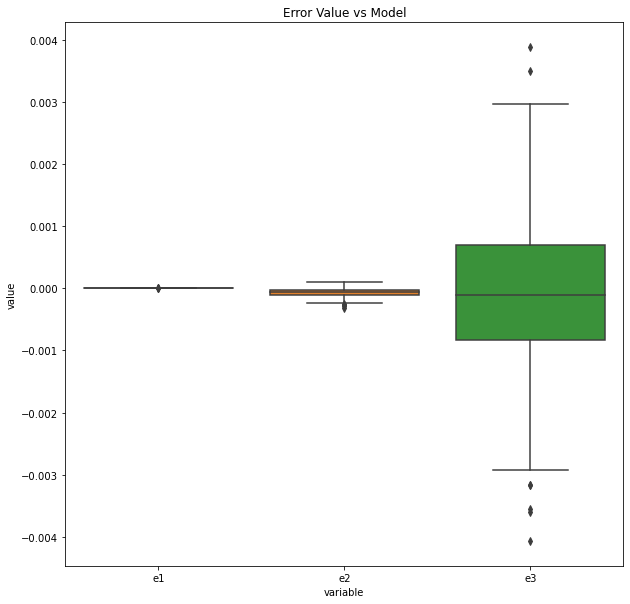

In [474]:
plt.figure(figsize=(10,10))

plt.title("Error Value vs Model")
sns.boxplot(x="variable", y="value", data=pd.melt(e))
plt.show()

# Iv. Report the differences between the ground truth β and the
# obtained β values in P1, P2. P3.

In [475]:
print("Difference between B and p1")
print("\nB[0] - p1[0]:",B[0] - p1[0],"\nB[1] - p1[1]:",B[1] - p1[1],"\nB[2] - p1[2]:",B[2] - p1[2])

Difference between B and p1

B[0] - p1[0]: -2.220446049250313e-16 
B[1] - p1[1]: 2.220446049250313e-16 
B[2] - p1[2]: -6.661338147750939e-16


In [476]:
print("Difference between B and p2")
print("\nB[0] - p2[0]:",B[0] - p2[0],"\nB[1] - p2[1]:",B[1] - p2[1],"\nB[2] - p2[2]:",B[2] - p2[2])

Difference between B and p2

B[0] - p2[0]: 6.319321883685447e-05 
B[1] - p2[1]: 3.3591365473206736e-05 
B[2] - p2[2]: 6.0501008379176824e-05


In [477]:
print("Difference between B and p3")
print("\nB[0] - p3[0]:",B[0] - p3[0],"\nB[1] - p3[1]:",B[1] - p3[1],"\nB[2] - p3[2]:",B[2] - p3[2])

Difference between B and p3

B[0] - p3[0]: -4.480845112708742e-05 
B[1] - p3[1]: 0.0011596759180332317 
B[2] - p3[2]: 0.0006788533149466591
